<a href="https://colab.research.google.com/github/Anish-Behuray/Restaurant_Analysis_Bangalore/blob/main/Main_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --quiet gdown
!gdown --id 11D4pV8DTKeaVy8R1bDFbooBBadAR0erz

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=11D4pV8DTKeaVy8R1bDFbooBBadAR0erz
From (redirected): https://drive.google.com/uc?id=11D4pV8DTKeaVy8R1bDFbooBBadAR0erz&confirm=t&uuid=c69f76e7-252d-4fea-8e1e-9779241d82be
To: /content/restaurant_data_final.csv
100% 1.01G/1.01G [00:11<00:00, 87.0MB/s]


In [ ]:
import pandas as pd

df = pd.read_csv('restaurant_data_final.csv')  # replace with the actual filename if different
df.head(3)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),...,Tamil,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vegan,Vietnamese,Wraps,cuisine_cluster
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,...,0,0,0,0,0,0,0,0,0,3
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,...,0,0,0,1,0,0,0,0,0,3
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
# Keep only rows where URL starts with 'https'
df = df[df['url'].str.startswith('https', na=False)]

# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)
print(len(df))

51717


In [ ]:
# Drop the specified columns
df.drop(['url', 'phone', 'menu_item'], axis=1, inplace=True)

In [ ]:
name_counts_df = df['name'].value_counts().reset_index()
name_counts_df.columns = ['name', 'count']
print(name_counts_df)


                              name  count
0                  Cafe Coffee Day     96
1                           Onesta     85
2                        Just Bake     73
3                Empire Restaurant     71
4                Five Star Chicken     70
...                            ...    ...
8787                 Hunan Express      1
8788  Sri chowdeshwari Mudde Hotel      1
8789              Mothi Restaurant      1
8790              Nalaas Aapakadai      1
8791                    Jalsa Adda      1

[8792 rows x 2 columns]


In [ ]:
df.drop_duplicates(inplace=True)
print(df.isnull().sum())

address                            0
name                               0
online_order                       0
book_table                         0
rate                            7765
votes                              0
location                          21
rest_type                        227
dish_liked                     28041
cuisines                          45
approx_cost(for two people)      345
reviews_list                       0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64


In [ ]:
# Number of dishes liked
df['num_dishes_liked'] = df['dish_liked'].apply(lambda x: len(str(x).split(', ')) if pd.notnull(x) else 0)

# Number of cuisines offered
df['num_cuisines'] = df['cuisines'].apply(lambda x: len(str(x).split(', ')) if pd.notnull(x) else 0)


In [ ]:
type_dummies = pd.get_dummies(df['listed_in(type)'], prefix='type')
df = pd.concat([df, type_dummies], axis=1)


In [ ]:
df.drop(['dish_liked'], axis=1, inplace=True)

In [ ]:
import numpy as np
import pandas as pd
import re
from ast import literal_eval

z
def clean_rating(val):
    if isinstance(val, str) and '/' in val:
        return float(val.split('/')[0])
    try:
        return float(val)
    except:
        return np.nan

df['rate'] = df['rate'].apply(clean_rating)

# Step 2: For rows where 'rate' is NaN, extract from 'reviews_list'
def extract_rating_from_reviews(review_text):
    try:
        # Convert string to list of tuples
        review_list = literal_eval(review_text)
        ratings = []
        for entry in review_list:
            match = re.search(r'Rated\s+(\d+(\.\d+)?)', entry[0])
            if match:
                ratings.append(float(match.group(1)))
        if ratings:
            return round(np.mean(ratings), 1)  # Take average
    except:
        pass
    return np.nan

# Apply only to missing rates
df.loc[df['rate'].isnull(), 'rate'] = df.loc[df['rate'].isnull(), 'reviews_list'].apply(extract_rating_from_reviews)


In [ ]:
df.head()


,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),...,listed_in(city),num_dishes_liked,num_cuisines,type_Buffet,type_Cafes,type_Delivery,type_Desserts,type_Dine-out,type_Drinks & nightlife,type_Pubs and bars
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,...,Banashankari,7,3,True,False,False,False,False,False,False
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,...,Banashankari,7,3,True,False,False,False,False,False,False
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,...,Banashankari,7,3,True,False,False,False,False,False,False
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,...,Banashankari,1,2,True,False,False,False,False,False,False
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,...,Banashankari,2,2,True,False,False,False,False,False,False


In [ ]:
df['approx_cost(for two people)'] = (
    df['approx_cost(for two people)']
    .astype(str)
    .str.replace(',', '', regex=False)
)

df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')

In [ ]:
avg_rating = df['rate'].mean()
print(f"rate: {avg_rating:.2f}")

rate: 3.69


In [ ]:
df.loc[(df['rate'].isnull()), 'rate'] = 3.5

In [ ]:
avg_rating = df['approx_cost(for two people)'].mean()
print(f"Average Approx Cost (for two people): ₹{avg_rating:.2f}")

Average Approx Cost (for two people): ₹555.46


In [ ]:
df.loc[(df['approx_cost(for two people)'].isnull()), 'approx_cost(for two people)'] = 555.46

In [ ]:
import numpy as np

# Define a function to extract second-last part from address
def extract_second_last(address):
    try:
        parts = [p.strip() for p in str(address).split(',')]
        if len(parts) >= 2:
            return parts[-2]
        else:
            return np.nan
    except:
        return np.nan

# Apply only where location is missing or empty
df['location'] = df.apply(
    lambda row: extract_second_last(row['address']) if pd.isnull(row['location']) or str(row['location']).strip() == '' else row['location'],
    axis=1
)


In [ ]:
df['rest_type'].replace(np.nan, '', regex=True, inplace=True)

<ipython-input-18-461815719>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rest_type'].replace(np.nan, '', regex=True, inplace=True)


Frustration index

In [ ]:
import ast

# Combine all review texts into one string per row
def extract_reviews(review_str):
    try:
        reviews = ast.literal_eval(review_str)
        return ' '.join([r[1] for r in reviews if isinstance(r, tuple) and len(r) > 1])
    except:
        return ''

df['combined_reviews'] = df['reviews_list'].apply(extract_reviews)

In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity  # Range: -1 (negative) to 1 (positive)

df['sentiment_score'] = df['combined_reviews'].apply(get_sentiment)

In [ ]:

df['norm_rate'] = (df['rate'] - df['rate'].min()) / (df['rate'].max() - df['rate'].min())
df['norm_sentiment'] = (df['sentiment_score'] - df['sentiment_score'].min()) / (df['sentiment_score'].max() - df['sentiment_score'].min())

# Frustration Index = 1 - avg of normalized satisfaction signals
df['frustration_index'] = 1 - (0.5 * df['norm_rate'] + 0.5 * df['norm_sentiment'])

In [ ]:
df[['name', 'rate', 'sentiment_score', 'frustration_index']].sort_values(by='frustration_index', ascending=False)

,name,rate,sentiment_score,frustration_index
3172,Chination,1.0,-1.0,1.0
9883,Ghar Ki Rasoi,1.0,-1.0,1.0
11313,Olives Restaurant,1.0,-1.0,1.0
9186,Olives Restaurant,1.0,-1.0,1.0
47942,Ghar Ki Rasoi,1.0,-1.0,1.0
...,...,...,...,...
48703,Sri Krishna Upahar,5.0,1.0,0.0
1619,Fresh Code,5.0,1.0,0.0
43638,Sri Krishna Upahar,5.0,1.0,0.0
20722,Sofiya Cakes,5.0,1.0,0.0


In [ ]:
# Group by restaurant name and calculate mean frustration index
avg_frustration_by_name = df.groupby('name')['frustration_index'].mean().reset_index()

# Optional: Sort by highest average frustration
avg_frustration_by_name = avg_frustration_by_name.sort_values(by='frustration_index', ascending=False)

# Show top 10 restaurants with highest frustration
avg_frustration_by_name.head(10)


,name,frustration_index
5518,Olives Restaurant,1.000000
3442,Hunger Nights,0.946094
1625,Chatkara,0.936875
8468,Vidya Bakery,0.926250
6749,Shree Alva's Delicacy,0.921875
6003,R.K Caterers,0.915000
8667,Xpress Dhaba,0.900000
1843,Club Food,0.880000
2552,Fire & Slice,0.877604
1431,Cake Bite,0.868750


In [ ]:
avg_frustration_by_name = df.groupby('name')['frustration_index'].mean().reset_index()
avg_frustration_by_name.columns = ['name', 'avg_frustration_by_name']

df = df.merge(avg_frustration_by_name, on='name', how='left')

<ipython-input-43-4385a8dcc4ca>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


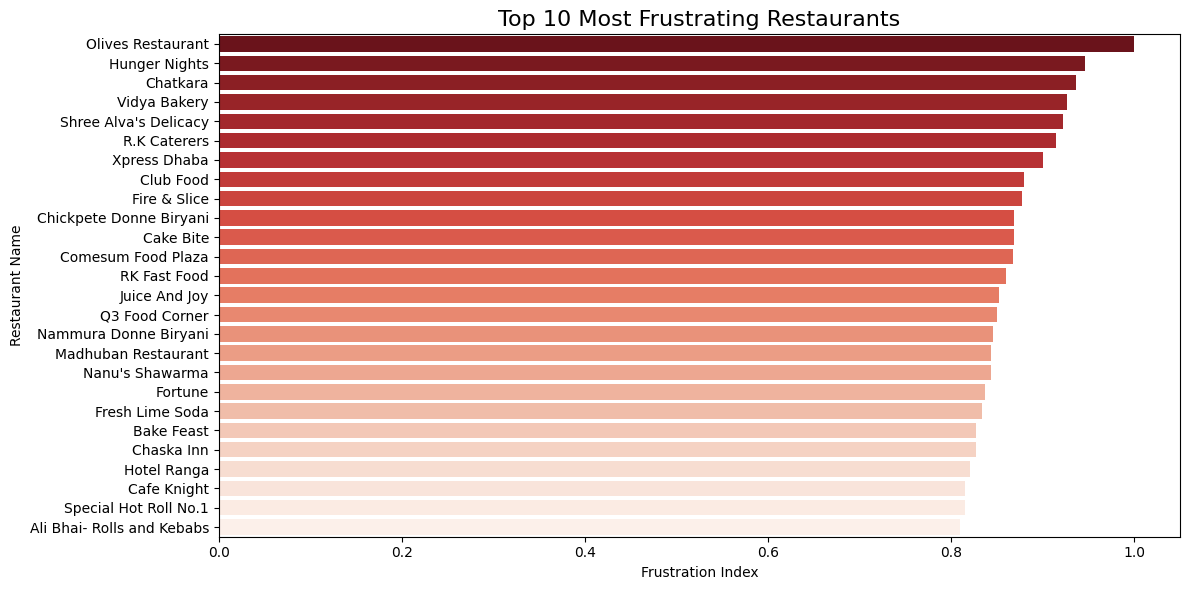

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Sort and select top 10 most frustrating restaurants
top_frustrated = df.sort_values(by='avg_frustration_by_name', ascending=False).head(100)

# Set figure size
plt.figure(figsize=(12, 6))

# Create horizontal bar chart
sns.barplot(
    data=top_frustrated,
    x='avg_frustration_by_name',
    y='name',
    palette='Reds_r'
)

# Add title and labels
plt.title('Top 10 Most Frustrating Restaurants', fontsize=16)
plt.xlabel('Frustration Index')
plt.ylabel('Restaurant Name')

# Show plot
plt.tight_layout()
plt.show()

Demand Heatmap

In [ ]:
demand_df = df.groupby('location').agg({
    'votes': 'sum',
    'rate': 'mean',
    'name': 'count'
}).reset_index().rename(columns={'name': 'num_restaurants'})

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
demand_df[['votes_norm', 'rate_norm', 'restaurant_norm']] = scaler.fit_transform(
    demand_df[['votes', 'rate', 'num_restaurants']]
)

In [ ]:
demand_df['demand_score'] = 0.5 * demand_df['votes_norm'] + \
                            0.3 * demand_df['restaurant_norm'] + \
                            0.2 * demand_df['rate_norm']

<ipython-input-47-05caaeb6a984>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_demand, x='demand_score', y='location', palette='viridis')


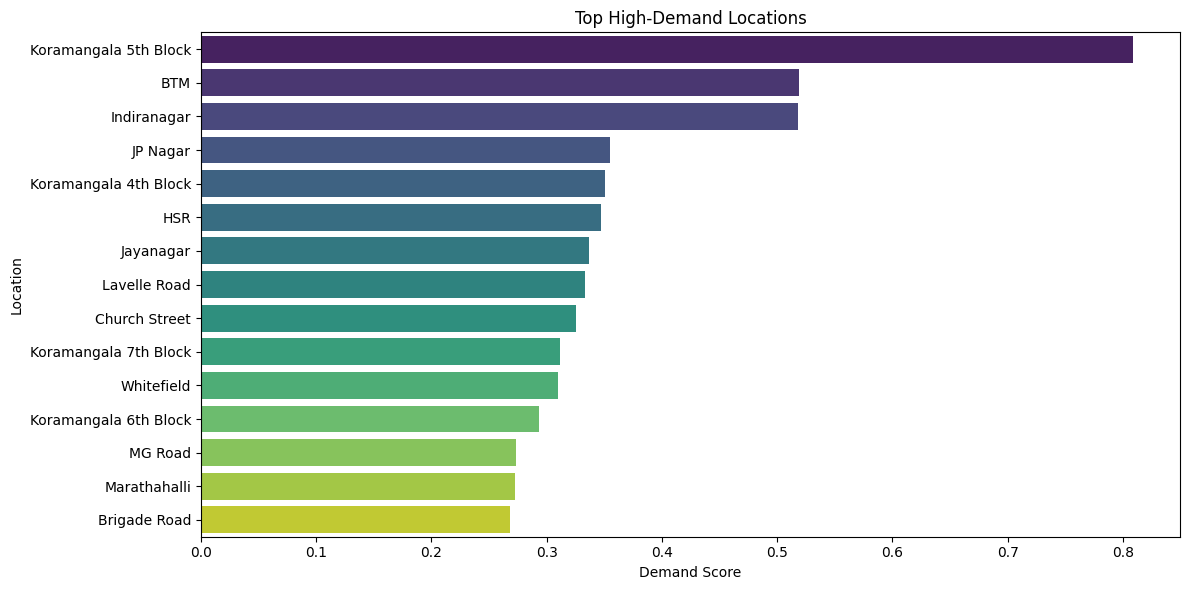

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

top_demand = demand_df.sort_values(by='demand_score', ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_demand, x='demand_score', y='location', palette='viridis')
plt.title('Top High-Demand Locations')
plt.xlabel('Demand Score')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

🍽️ Cuisine-Based Clustering by Location

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

df['cuisines'] = df['cuisines'].fillna('').astype(str)
df['cuisine_list'] = df['cuisines'].apply(lambda x: [i.strip() for i in x.split(',')])

mlb = MultiLabelBinarizer()
cuisine_dummies = pd.DataFrame(mlb.fit_transform(df['cuisine_list']), columns=mlb.classes_, index=df.index)

df = pd.concat([df, cuisine_dummies], axis=1)
df.drop('cuisine_list', axis=1, inplace=True)

In [ ]:
location_cuisine = df.groupby('location')[mlb.classes_].sum()

In [ ]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
location_cuisine['cluster'] = kmeans.fit_predict(location_cuisine)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df_cuisine = df.copy()
df_cuisine = df_cuisine.dropna(subset=['location', 'cuisines'])

df_cuisine['cuisines'] = df_cuisine['cuisines'].apply(lambda x: x.split(', '))
df_exploded = df_cuisine.explode('cuisines')

cuisine_dummies = pd.get_dummies(df_exploded['cuisines'])

cuisine_by_location = pd.concat([df_exploded['location'], cuisine_dummies], axis=1)
cuisine_by_location = cuisine_by_location.groupby('location').sum().reset_index()

scaler = StandardScaler()
cuisine_scaled = scaler.fit_transform(cuisine_by_location.drop('location', axis=1))

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
cuisine_by_location['cluster'] = kmeans.fit_predict(cuisine_scaled)


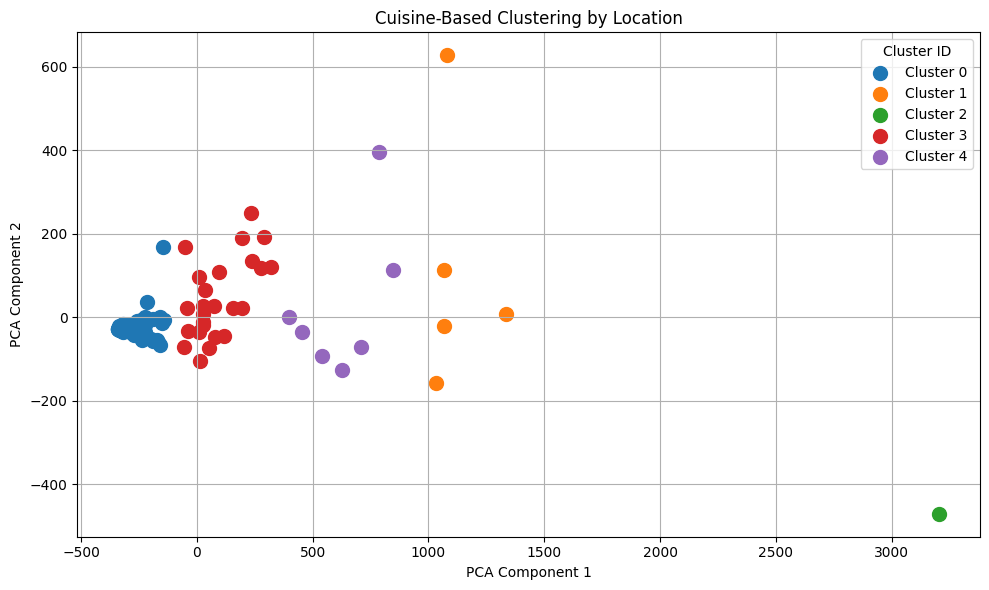

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA for 2D projection
pca = PCA(n_components=2)
pca_result = pca.fit_transform(location_cuisine.drop('cluster', axis=1))

# Add PCA columns to the DataFrame
location_cuisine['pca1'] = pca_result[:, 0]
location_cuisine['pca2'] = pca_result[:, 1]

# Plot with color-coded clusters
plt.figure(figsize=(10, 6))
for cluster_num in sorted(location_cuisine['cluster'].unique()):
    cluster_data = location_cuisine[location_cuisine['cluster'] == cluster_num]
    plt.scatter(cluster_data['pca1'], cluster_data['pca2'],
                label=f"Cluster {cluster_num}", s=100)

plt.title('Cuisine-Based Clustering by Location')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Make sure location_cuisine has 'location' and 'cluster' columns
# If location is the index, reset it first
if location_cuisine.index.name == 'location':
    location_cuisine = location_cuisine.reset_index()

# Just to be safe, keep only the necessary columns
location_cluster_map = location_cuisine[['location', 'cluster']]

# Merge with main DataFrame to assign cluster to each restaurant
df = df.merge(location_cluster_map, on='location', how='left')

# Optional: Rename column for clarity
df.rename(columns={'cluster': 'cuisine_cluster'}, inplace=True)


In [ ]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),...,Tamil,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vegan,Vietnamese,Wraps,cuisine_cluster
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,...,0,0,0,0,0,0,0,0,0,3
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,...,0,0,0,1,0,0,0,0,0,3
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,...,0,0,0,0,0,0,0,0,0,3
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,...,0,0,0,0,0,0,0,0,0,3
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
import pandas as pd

# Step 1: Select only cuisine one-hot encoded columns
cuisine_columns = location_cuisine.drop(columns=['cluster', 'pca1', 'pca2'], errors='ignore').select_dtypes(include=['int', 'float', 'bool']).columns

# Step 2: Group by cluster and calculate mean for each cuisine (i.e., proportion)
cluster_cuisine_profile = location_cuisine.groupby('cluster')[cuisine_columns].mean()

# Step 3: Create a new DataFrame to store summary
cluster_summary_rows = []

for cluster_id, row in cluster_cuisine_profile.iterrows():
    top_cuisines = row.sort_values(ascending=False).head(5)
    summary = {
        "cluster": cluster_id,
        "top_cuisines": ', '.join(top_cuisines.index),
        "avg_values": ', '.join(f"{val:.2f}" for val in top_cuisines.values)
    }
    cluster_summary_rows.append(summary)

# Step 4: Final summary table
cuisine_cluster_summary = pd.DataFrame(cluster_summary_rows)

# Show the table
print(cuisine_cluster_summary)


   cluster                                       top_cuisines  \
0        0  North Indian, Chinese, South Indian, Fast Food...   
1        1  North Indian, Chinese, South Indian, Fast Food...   
2        2  North Indian, Chinese, Fast Food, Biryani, Sou...   
3        3  North Indian, Chinese, South Indian, Fast Food...   
4        4  North Indian, Chinese, South Indian, Fast Food...   

                                 avg_values  
0         45.21, 33.95, 20.51, 17.09, 13.32  
1    986.40, 683.80, 325.40, 317.80, 308.80  
2  2466.00, 1821.00, 982.00, 841.00, 815.00  
3     263.52, 210.44, 128.56, 114.60, 95.00  
4    643.29, 442.00, 258.71, 239.43, 208.29  


In [ ]:
# Save the main DataFrame
df.to_csv("restaurant_data_final.csv", index=False)

# Save the cuisine cluster summary table
cuisine_cluster_summary.to_csv("cuisine_cluster_summary.csv", index=False)
from google.colab import files

# Download both CSVs
files.download("restaurant_data_final.csv")
files.download("cuisine_cluster_summary.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Reset index to merge cluster info with location
location_cuisine = location_cuisine.reset_index()

# Map top 5 cuisine types in each cluster
top_cuisines_by_cluster = location_cuisine.groupby('cluster').apply(
    lambda g: g.drop(['location', 'cluster', 'pca1', 'pca2'], axis=1).sum().sort_values(ascending=False).head(5).index.tolist()
).reset_index(name='top_cuisines')

top_cuisines_by_cluster


<ipython-input-27-2276279289>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_cuisines_by_cluster = location_cuisine.groupby('cluster').apply(


,cluster,top_cuisines
0,0,"[index, North Indian, Chinese, South Indian, F..."
1,1,"[North Indian, Chinese, South Indian, Fast Foo..."
2,2,"[North Indian, Chinese, Fast Food, Biryani, So..."
3,3,"[North Indian, Chinese, South Indian, Fast Foo..."
4,4,"[North Indian, Chinese, South Indian, Fast Foo..."


Recommendation System

In [ ]:
# import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.neighbors import NearestNeighbors

# Load dataset
# df = pd.read_csv("C:/Users/ANISH/Desktop/project 2/restaurant_data_final.csv")

# Step 1: Clean and preprocess
df = df.dropna(subset=['norm_rate', 'sentiment_score', 'cuisine_cluster', 'location'])  # Drop missing

# Encode location
le = LabelEncoder()
df['location_encoded'] = le.fit_transform(df['location'])

# Create features
feature_cols = ['norm_rate', 'sentiment_score', 'cuisine_cluster', 'location_encoded']
features = df[feature_cols].copy()

# Normalize
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Step 2: Fit Nearest Neighbors with cosine similarity
nn = NearestNeighbors(n_neighbors=6, metric='cosine')  # 1 self + 5 recommendations
nn.fit(features_scaled)

# Step 3: Define recommendation function
def recommend_restaurants(name, top_n=10):
    # Find all exact matches (case-insensitive)
    matches = df[df['name'].str.lower() == name.lower()]
    if matches.empty:
        return f"❌ Restaurant '{name}' not found."

    # Use the first matched restaurant's index
    idx = matches.index[0]

    # Get neighbors (including self)
    distances, indices = nn.kneighbors([features_scaled[idx]], n_neighbors=top_n + 20)  # add buffer

    # Skip the first one (the restaurant itself)
    rec_indices = indices[0][1:]

    # Get unique names only
    recommended = df.loc[rec_indices, ['name', 'location', 'rate', 'sentiment_score', 'frustration_index']]
    recommended_unique = recommended.drop_duplicates(subset='name').head(top_n)

    return recommended_unique


# Example
print(recommend_restaurants("CAfe Coffee day", top_n=20))


                             name      location  rate  sentiment_score  \
517                   Cocoa Bakes  Banashankari   3.6         0.148006   
21437               Chilli Flakes  Banashankari   3.6         0.152740   
20278          Vietnamese Kitchen  Banashankari   3.6         0.141054   
352                 Namma Biryani  Banashankari   3.6         0.128454   
595               Kadala Tarangaa  Banashankari   3.6         0.172654   
24278                    Eat Well     Banaswadi   3.6         0.142754   
25881           American Desserts     Banaswadi   3.6         0.133114   
23                   My Tea House  Banashankari   3.6         0.180000   
2904   Vasanth Vihar - Since 1965  Banashankari   3.6         0.180178   
70                  The Good Bowl  Banashankari   3.6         0.190915   
615    Sri Ganesh Juice and Chats  Banashankari   3.5         0.118889   
629                     Pizza Hut  Banashankari   3.7         0.145833   
25050          Urban Bakes & Cafe     